# Data Exploration

Exploring the variables to get a sense of our dataset  
Summarizing the main characteristics of the data and visualize

## Setup

In [4]:
import numpy as np
import pandas as pd

from IPython.display import display

import matplotlib  
import matplotlib.pyplot as plt  
from matplotlib import rcParams

import seaborn as sns
sns.set(style='ticks', palette='Set2')

from plotnine import *

In [5]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [6]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [7]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 9999)

## Dataset

In [126]:
# Retrieving Data

df=pd.read_csv('cleaned.csv')
df.head(1)

,from_date,from_time,to_date,to_time,offense,offense_description,law_category,occurence,premise,borough,latitude,longitude,year,Month,weekday,holiday,hour,time_str,time,no_of_month,Day_of_month,no_of_weekday,offense_cutoff
0,2017-03-31,23:30:00,NaN,NaN,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,INSIDE,RESIDENCE - APT. HOUSE,BROOKLYN,40.638018,-73.898491,2017,Mar,Friday,0,23,2017-03-31 23:30:00,2017-03-31 23:30:00,3,31,4,HARRASSMENT 2


## Let's see our data

In [44]:
print('No. of Borough: ',len(df["borough"][df.borough.notnull()].unique()))
print('No. of offense_cutoff: ',len(df["offense_cutoff"][df.borough.notnull()].unique()))
print('No. of law_category: ',len(df["law_category"][df.borough.notnull()].unique()))
print('No. of year: ',len(df["year"][df.borough.notnull()].unique()))
print('No. of holiday: ',len(df.holiday[df.holiday == 1]))

No. of Borough:  5
No. of offense_cutoff:  31
No. of law_category:  3
No. of year:  12
No. of holiday:  16427


In [52]:
print('No. of holiday in 2016: ',len(df[df.year == 2016].holiday[df.holiday == 1]))

No. of holiday in 2016:  1224


### Law category

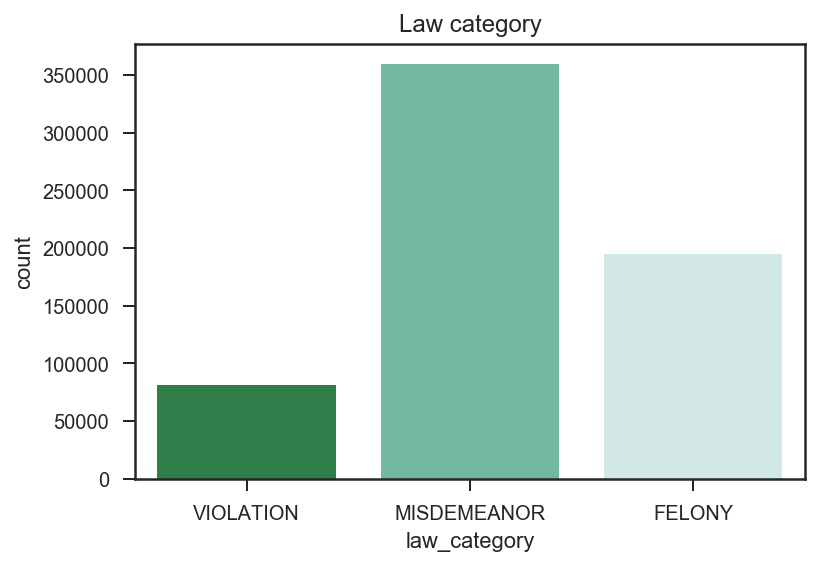

In [54]:
sns.countplot(x="law_category", data=df, palette="BuGn_r" ).set_title('Law category')
plt.show()

As you see from this graph misdemeanor seems the leading crime type.

In [55]:
df['law_category'].value_counts()

MISDEMEANOR    359426
FELONY         194476
VIOLATION       81323
Name: law_category, dtype: int64

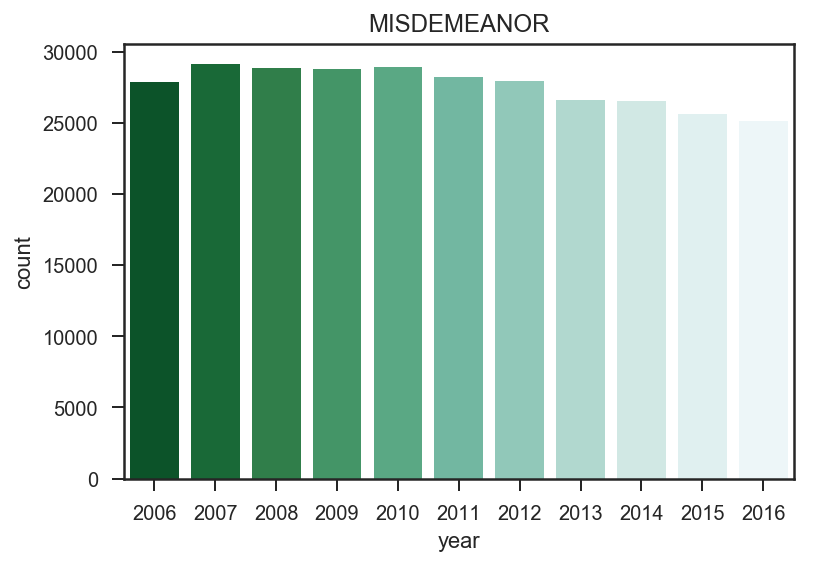

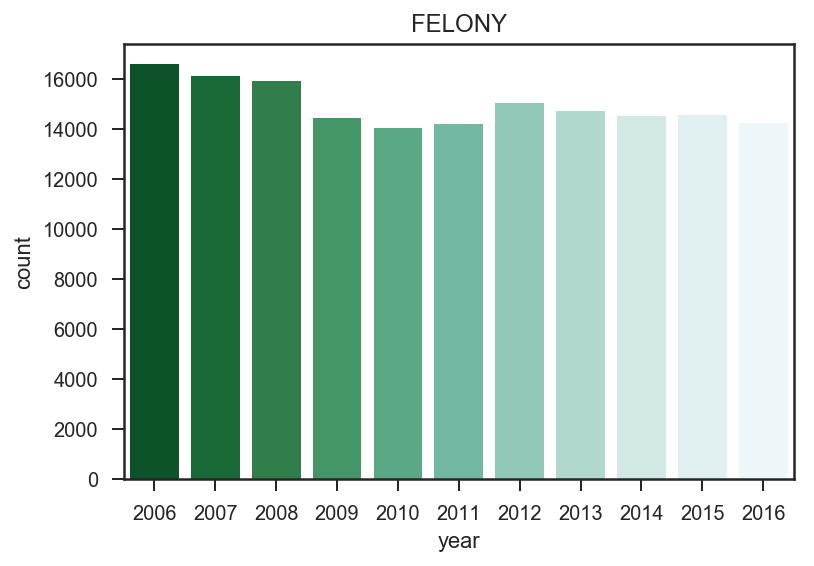

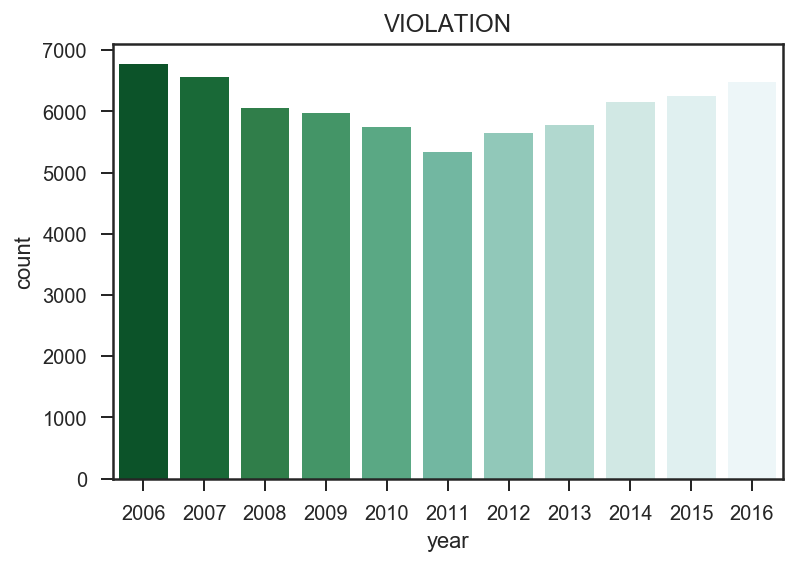

In [65]:
sns.countplot(x="year", data=df[(df.law_category == 'MISDEMEANOR')& (df.year != 2017)], palette="BuGn_r" ).set_title('MISDEMEANOR')
plt.show()
sns.countplot(x="year", data=df[(df.law_category == 'FELONY')& (df.year != 2017)], palette="BuGn_r" ).set_title('FELONY')
plt.show()
sns.countplot(x="year", data=df[(df.law_category == 'VIOLATION')& (df.year != 2017)], palette="BuGn_r" ).set_title('VIOLATION')
plt.show()

Yearly trend:  
    Misdemeanor: the misdemeanor related offeneses slightly lower from 2013  
    Felony: the reduction of crime was between 2009 and 2011  
    Violation: Crime rate declined till 2011 then started climbing steadily  

### Offense category

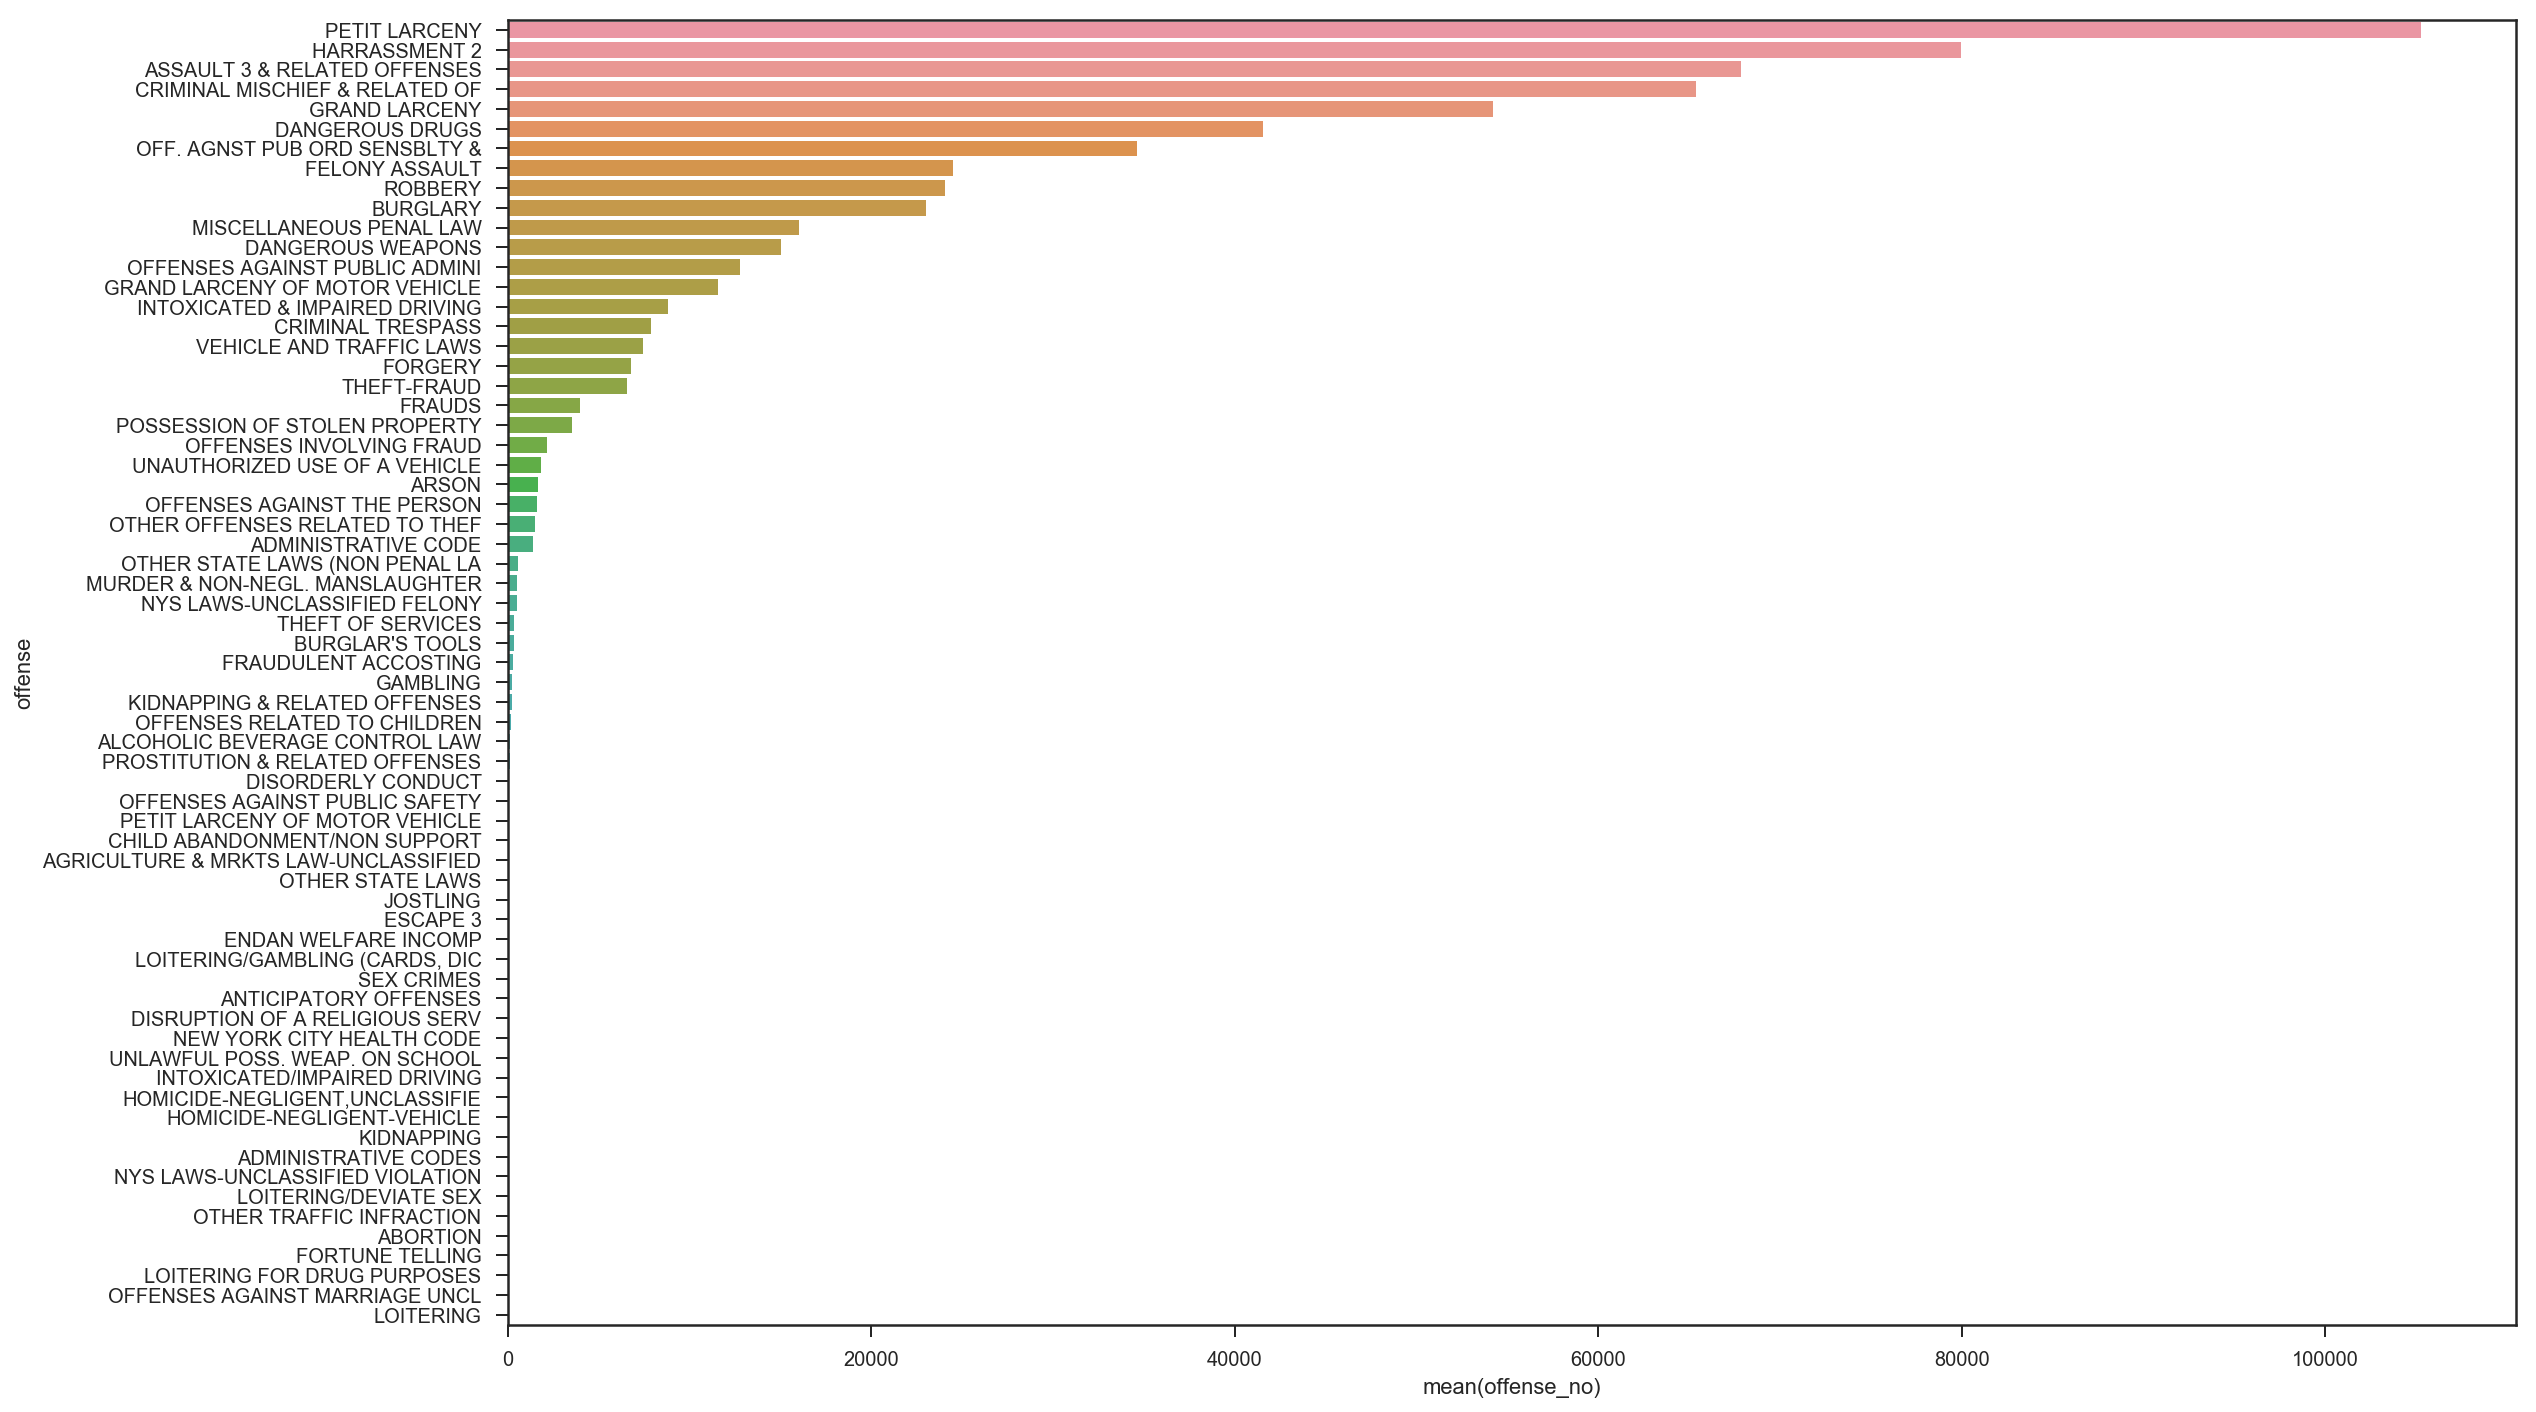

In [69]:
offense_no=(df.offense.value_counts())
df_offense_no=pd.DataFrame([offense_no])
df_offense_no=df_offense_no.T
df_offense_no=df_offense_no.reset_index()
df_offense_no.columns = ['offense', 'offense_no']

sns.barplot(y='offense', x='offense_no', data=df_offense_no)
plt.rcParams['figure.figsize']=20,12

In [71]:
# TOP 10 offence crime
offense_crime = pd.crosstab(index=df["offense"],  
                              columns="count")     

offense_crime.sort_values(by='count',ascending=False)[:10]

col_0,count
offense,
PETIT LARCENY,105236
HARRASSMENT 2,79945
ASSAULT 3 & RELATED OFFENSES,67856
CRIMINAL MISCHIEF & RELATED OF,65369
GRAND LARCENY,54184
DANGEROUS DRUGS,41563
OFF. AGNST PUB ORD SENSBLTY &,34648
FELONY ASSAULT,24510
ROBBERY,24056


The main offense crimes are petit larceny, harrassment, assult, criminal mischief, grand larceny and dangerous drugs

In [72]:
MISDEMEANOR_offense = df['offense'][df.law_category=='MISDEMEANOR'].value_counts()
MISDEMEANOR_offense[:10]

PETIT LARCENY                     105236
ASSAULT 3 & RELATED OFFENSES       67856
CRIMINAL MISCHIEF & RELATED OF     55124
OFF. AGNST PUB ORD SENSBLTY &      34648
DANGEROUS DRUGS                    33811
OFFENSES AGAINST PUBLIC ADMINI     12788
INTOXICATED & IMPAIRED DRIVING      8825
DANGEROUS WEAPONS                   8499
CRIMINAL TRESPASS                   7899
VEHICLE AND TRAFFIC LAWS            7453
Name: offense, dtype: int64

In [73]:
FELONY_offense = df['offense'][df.law_category=='FELONY'].value_counts()
FELONY_offense[:10]

GRAND LARCENY                     54184
FELONY ASSAULT                    24510
ROBBERY                           24056
BURGLARY                          23026
MISCELLANEOUS PENAL LAW           14977
GRAND LARCENY OF MOTOR VEHICLE    11587
CRIMINAL MISCHIEF & RELATED OF    10245
DANGEROUS DRUGS                    7752
FORGERY                            6797
THEFT-FRAUD                        6597
Name: offense, dtype: int64

In [74]:
VIOLATION_offense = df['offense'][df.law_category=='VIOLATION'].value_counts()
VIOLATION_offense[:10]

HARRASSMENT 2                      79945
MISCELLANEOUS PENAL LAW             1054
ADMINISTRATIVE CODE                  149
DISORDERLY CONDUCT                    95
OTHER STATE LAWS                      37
LOITERING/GAMBLING (CARDS, DIC        18
UNLAWFUL POSS. WEAP. ON SCHOOL         9
NEW YORK CITY HEALTH CODE              4
ADMINISTRATIVE CODES                   4
NYS LAWS-UNCLASSIFIED VIOLATION        3
Name: offense, dtype: int64

### Crime by weekday

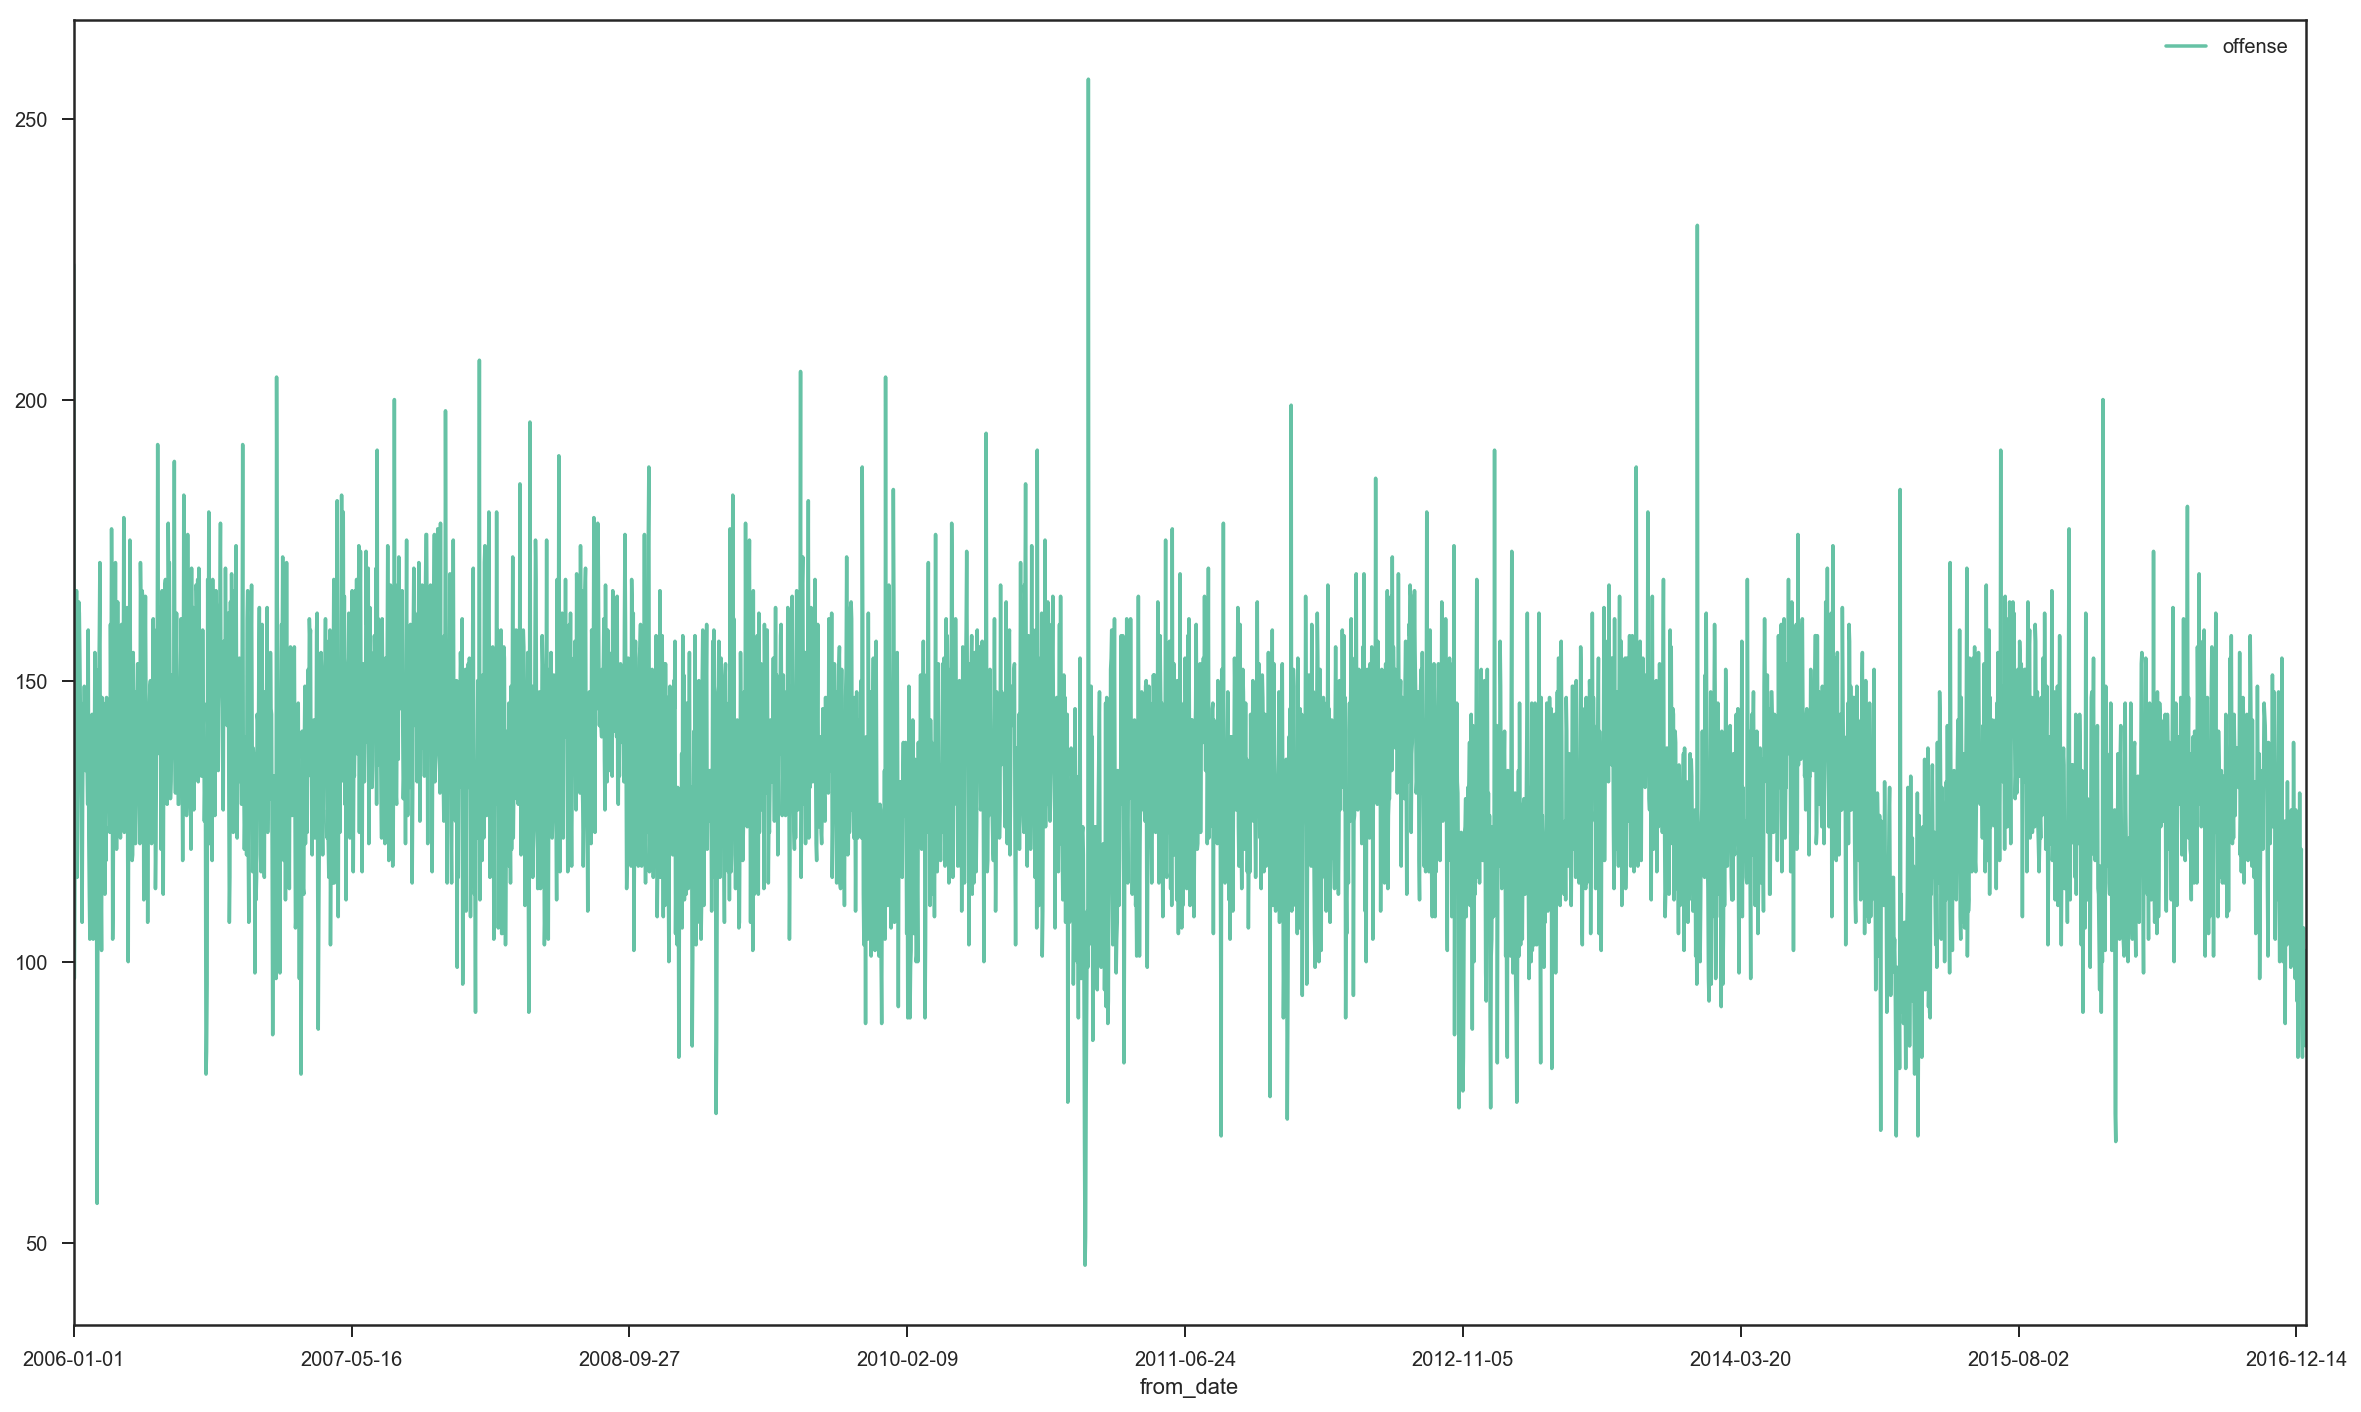

In [76]:
# year 2006 - 2016
from datetime import datetime
dfx = df.copy()
dfx = dfx[dfx.year != 2017]

dfx.groupby(by='from_date').count().plot(y='offense')

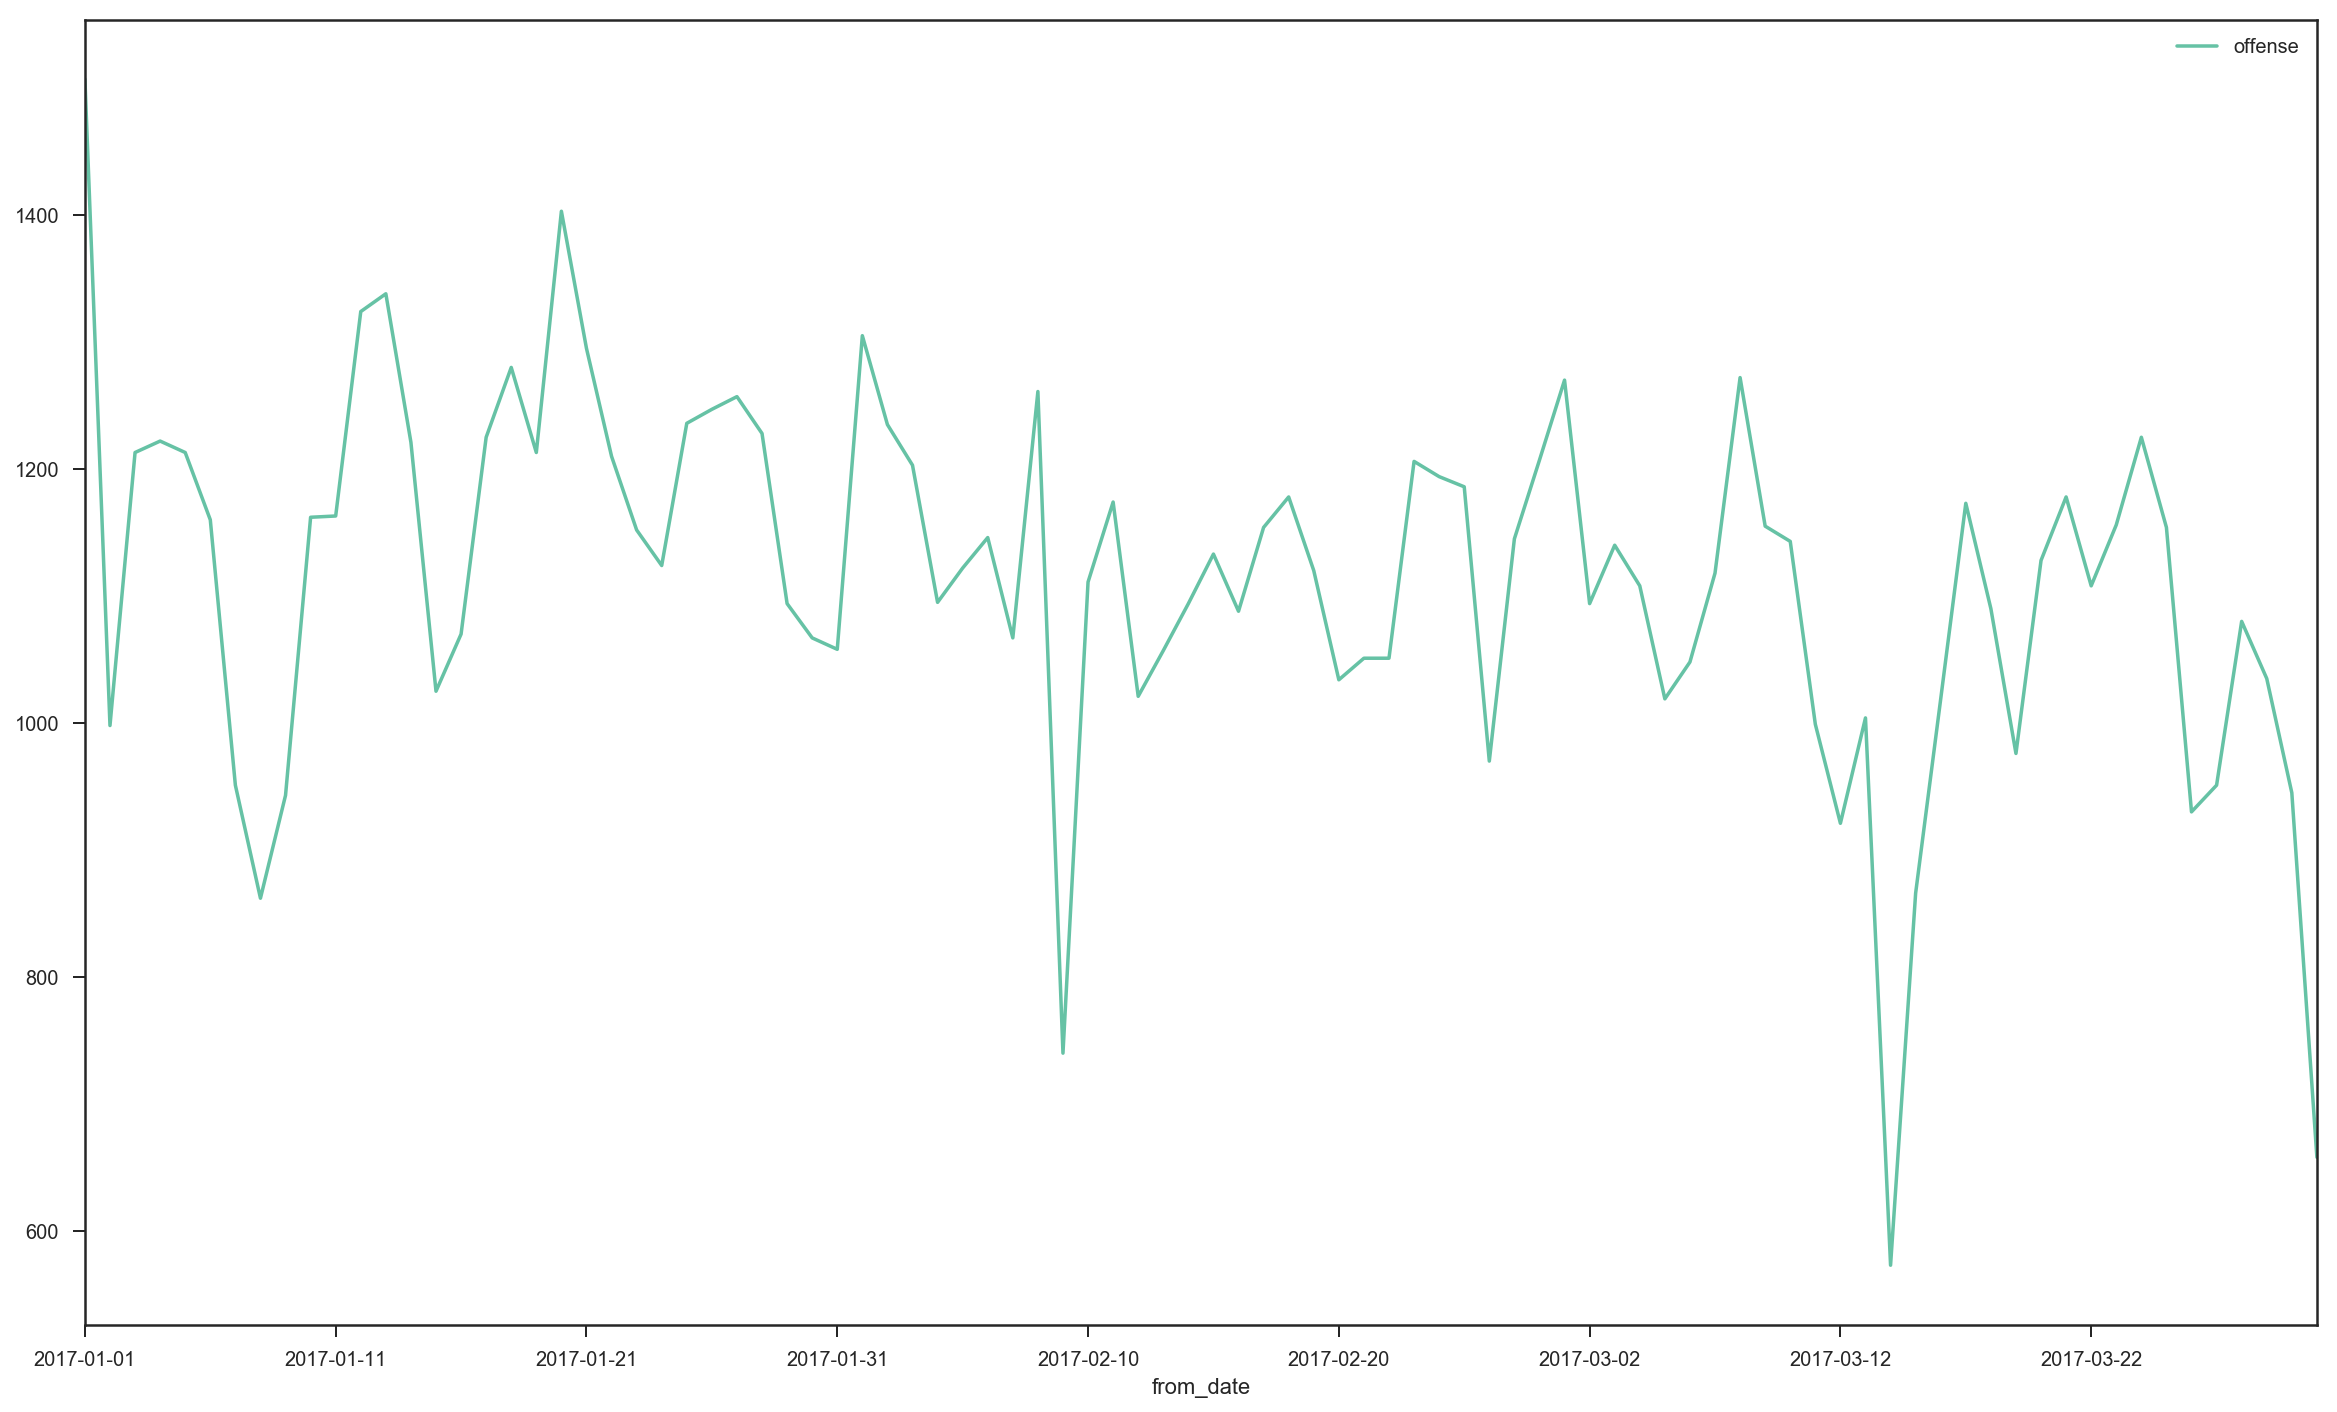

In [77]:
# year 2017
from datetime import datetime
dfx = df.copy()
dfx = dfx[dfx.year == 2017]

dfx.groupby(by='from_date').count().plot(y='offense')

There are random fluctuations which do not appear to be very predictable, and no strong patterns that would help with developing a model.  

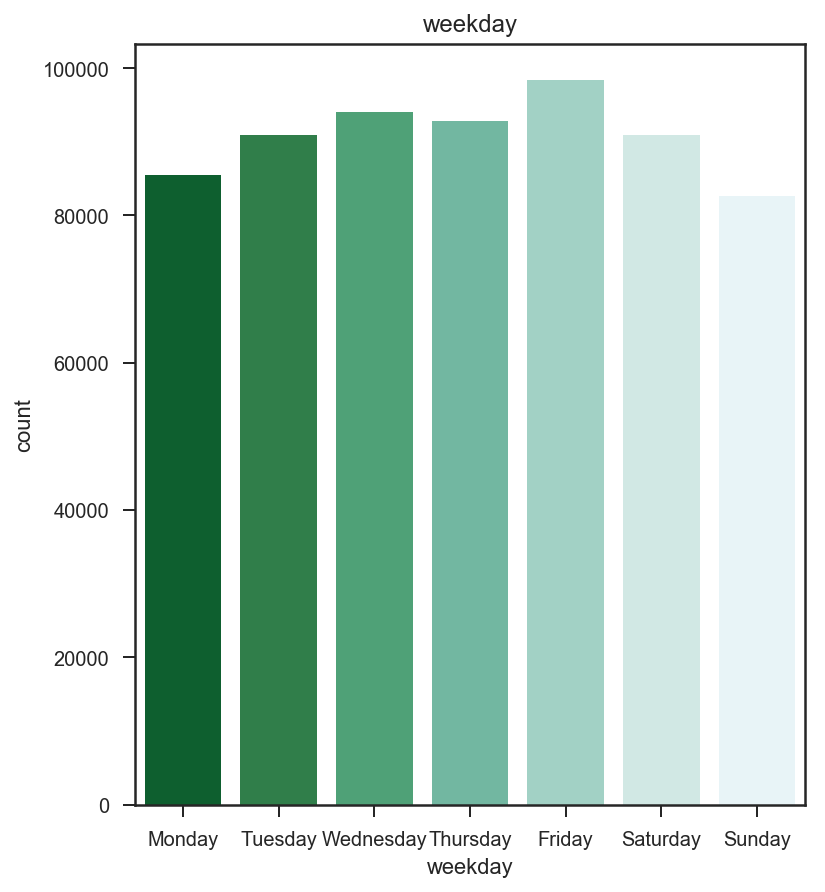

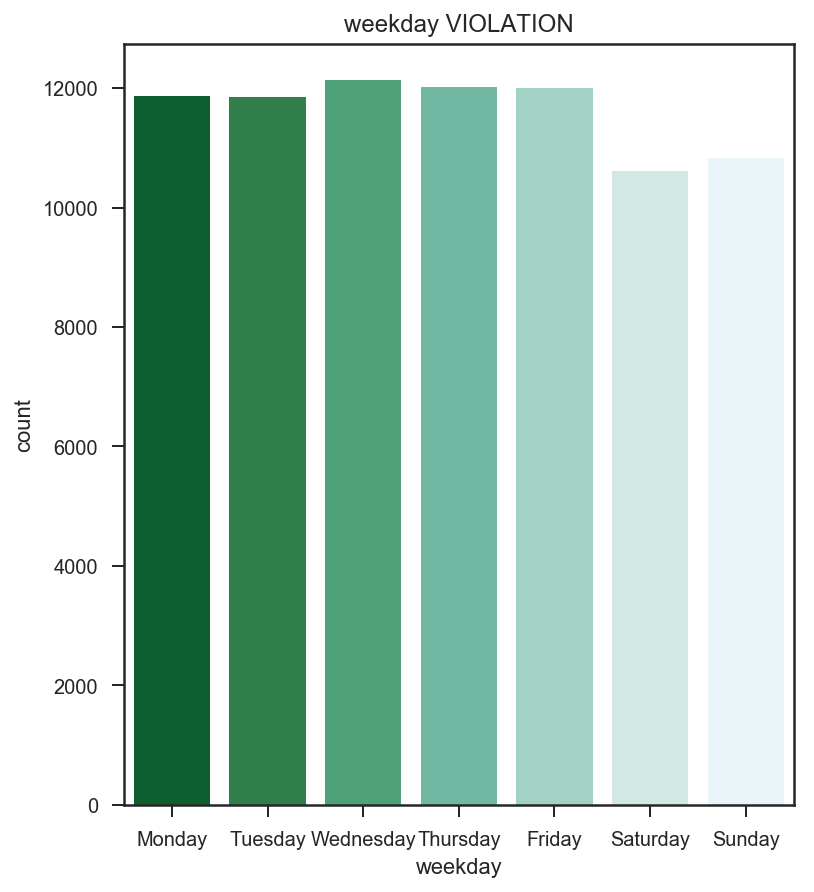

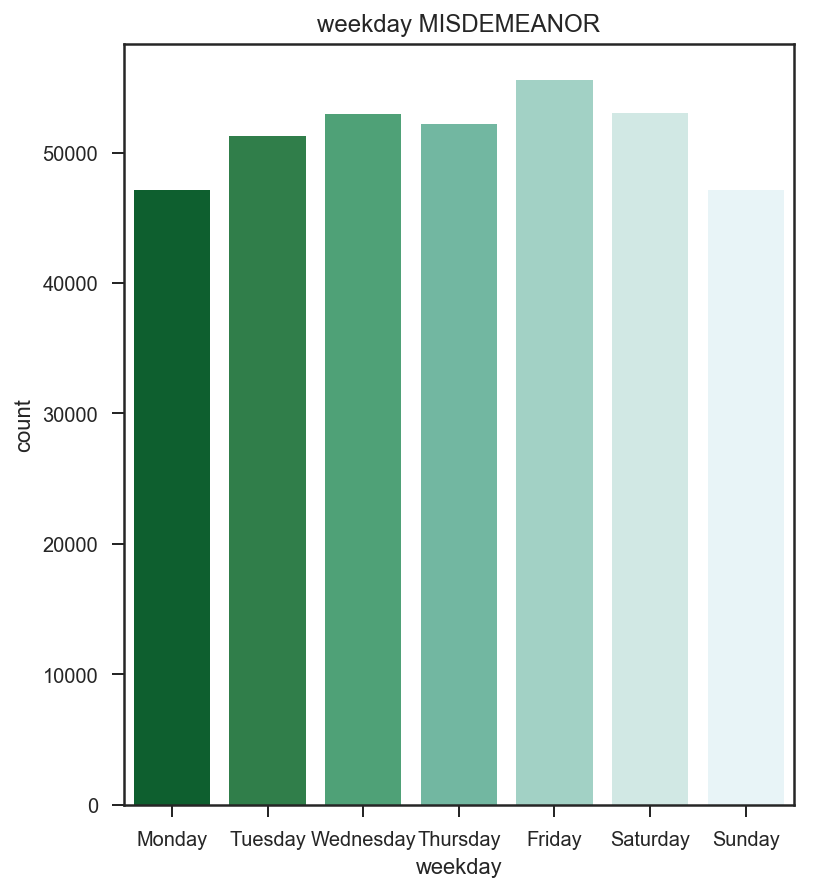

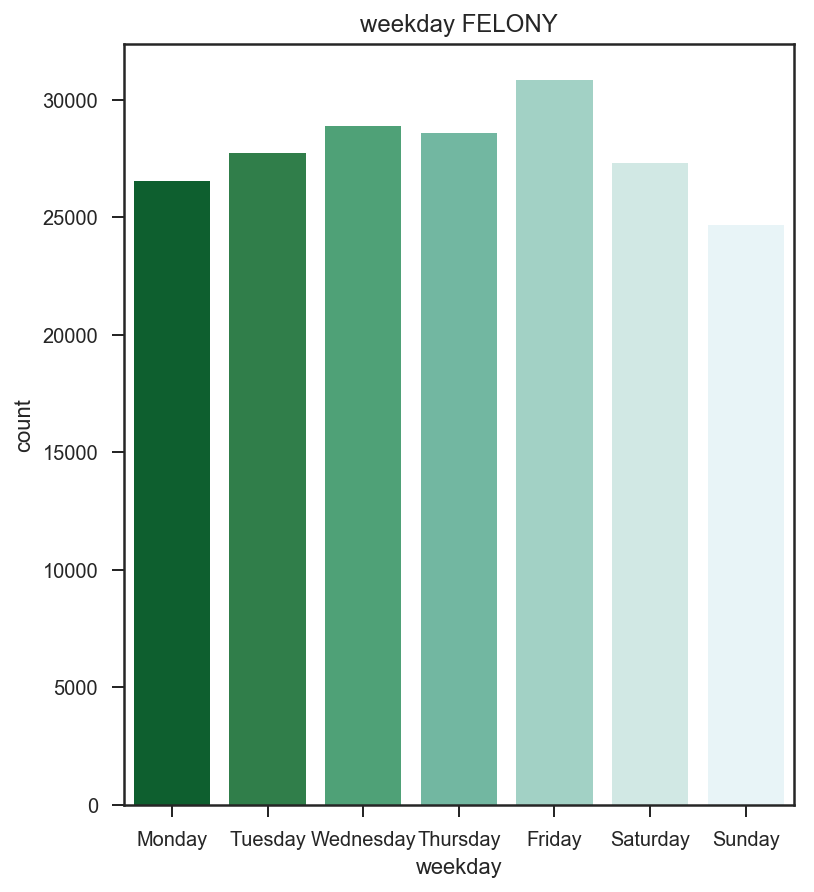

In [85]:
k=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x="weekday", data=df, palette="BuGn_r",order=k ).set_title('weekday')
plt.show()

sns.countplot(x="weekday", data=df[(df.law_category=='VIOLATION')], palette="BuGn_r",order=k ).set_title('weekday VIOLATION')
plt.show()

sns.countplot(x="weekday", data=df[(df.law_category=='MISDEMEANOR')], palette="BuGn_r",order=k ).set_title('weekday MISDEMEANOR')
plt.show()

sns.countplot(x="weekday", data=df[(df.law_category=='FELONY')], palette="BuGn_r",order=k ).set_title('weekday FELONY')
plt.show()

plt.rcParams['figure.figsize']=6,7

In [87]:
week_offense_category = pd.crosstab(index=df["weekday"], 
                           columns=[df["offense"]],
                                   margins=True)

week_offense_category

offense,ABORTION,ADMINISTRATIVE CODE,ADMINISTRATIVE CODES,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ALCOHOLIC BEVERAGE CONTROL LAW,ANTICIPATORY OFFENSES,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,BURGLARY,CHILD ABANDONMENT/NON SUPPORT,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL TRESPASS,DANGEROUS DRUGS,DANGEROUS WEAPONS,DISORDERLY CONDUCT,DISRUPTION OF A RELIGIOUS SERV,ENDAN WELFARE INCOMP,ESCAPE 3,FELONY ASSAULT,FORGERY,FORTUNE TELLING,FRAUDS,FRAUDULENT ACCOSTING,GAMBLING,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,HARRASSMENT 2,"HOMICIDE-NEGLIGENT,UNCLASSIFIE",HOMICIDE-NEGLIGENT-VEHICLE,INTOXICATED & IMPAIRED DRIVING,INTOXICATED/IMPAIRED DRIVING,JOSTLING,KIDNAPPING,KIDNAPPING & RELATED OFFENSES,LOITERING,LOITERING FOR DRUG PURPOSES,LOITERING/DEVIATE SEX,"LOITERING/GAMBLING (CARDS, DIC",MISCELLANEOUS PENAL LAW,MURDER & NON-NEGL. MANSLAUGHTER,NEW YORK CITY HEALTH CODE,NYS LAWS-UNCLASSIFIED FELONY,NYS LAWS-UNCLASSIFIED VIOLATION,OFF. AGNST PUB ORD SENSBLTY &,OFFENSES AGAINST MARRIAGE UNCL,OFFENSES AGAINST PUBLIC ADMINI,OFFENSES AGAINST PUBLIC SAFETY,OFFENSES AGAINST THE PERSON,OFFENSES INVOLVING FRAUD,OFFENSES RELATED TO CHILDREN,OTHER OFFENSES RELATED TO THEF,OTHER STATE LAWS,OTHER STATE LAWS (NON PENAL LA,OTHER TRAFFIC INFRACTION,PETIT LARCENY,PETIT LARCENY OF MOTOR VEHICLE,POSSESSION OF STOLEN PROPERTY,PROSTITUTION & RELATED OFFENSES,ROBBERY,SEX CRIMES,THEFT OF SERVICES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNLAWFUL POSS. WEAP. ON SCHOOL,VEHICLE AND TRAFFIC LAWS,All
weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Friday,0,213,0,10,33,2,232,9817,56,4111,6,10266,1348,7177,2670,22,3,4,3,3352,1069,1,646,41,57,8870,1789,11749,0,2,1241,0,3,0,47,0,0,0,3,2484,82,0,69,0,4889,0,1933,13,260,381,50,222,7,88,0,16305,10,571,35,3574,1,64,1112,287,0,1146,98426
Monday,0,206,2,6,6,3,276,9173,31,3431,9,8833,861,3272,1313,5,1,5,2,3217,738,0,570,33,16,7871,1680,11714,1,1,807,0,4,0,41,0,0,1,0,1997,68,1,70,1,5502,0,1532,6,195,186,3,208,4,37,0,15202,12,373,9,3548,6,44,1127,256,0,1025,85541
Saturday,0,194,1,7,42,1,212,10702,38,2735,9,9897,1128,6056,2384,21,1,0,3,4144,832,0,476,62,48,7441,1720,10423,0,1,2460,3,6,1,42,0,0,0,2,2294,72,0,73,0,4427,0,1920,9,252,328,53,261,3,52,1,14390,13,408,24,3274,1,33,672,252,1,1058,90963
Sunday,1,150,0,7,26,1,289,11207,21,2278,5,9167,810,3260,1482,13,2,0,5,4512,568,0,394,30,31,6519,1673,10675,1,0,2138,4,3,0,40,0,1,0,1,2112,86,2,48,1,4496,0,1762,10,233,232,22,229,5,32,0,12680,14,303,10,3388,1,26,534,217,0,909,82666
Thursday,0,197,1,3,20,1,202,8976,71,3434,4,9133,1252,7269,2465,9,1,6,6,3146,1218,0,608,57,40,7812,1618,11789,0,1,858,0,11,1,27,0,0,0,7,2486,72,1,83,0,5037,0,1937,13,230,344,21,221,6,115,0,15348,6,650,23,3401,2,69,1049,295,3,1117,92772
Tuesday,0,216,0,7,5,3,232,8948,50,3470,8,9034,1175,6923,2185,13,0,0,3,3079,1100,0,620,30,26,7771,1559,11642,0,1,591,1,3,3,30,0,0,1,0,2261,64,2,80,1,5107,1,1782,11,213,335,15,195,9,114,0,15504,11,566,5,3379,3,67,1035,272,1,1101,90863
Wednesday,0,204,0,5,12,2,212,9033,69,3567,5,9039,1325,7606,2567,12,2,4,0,3060,1272,0,650,55,39,7900,1548,11953,5,1,730,0,2,0,29,1,0,0,5,2397,73,4,78,0,5190,0,1922,19,235,345,23,187,3,123,1,15807,12,659,6,3492,4,66,1068,265,4,1097,93994
All,1,1380,4,45,144,13,1655,67856,336,23026,46,65369,7899,41563,15066,95,10,19,22,24510,6797,1,3964,308,257,54184,11587,79945,7,7,8825,8,32,5,256,1,1,2,18,16031,517,10,501,3,34648,1,12788,81,1618,2151,187,1523,37,561,2,105236,78,3530,112,24056,18,369,6597,1844,9,7453,635225


Wednesday and Thursday, Friday seem to be peek points

### Crime type in the weekend _ crime type in the weekday

In [89]:
# TOP 10 offense crime in weekend
weekend_offense = pd.crosstab(index=df[(df.weekday=='Saturday')|(df.weekday=='Sunday')]["offense"],  
                              columns="count")      

weekend_offense.sort_values(by='count',ascending=False)[:10]

col_0,count
offense,
PETIT LARCENY,27070
ASSAULT 3 & RELATED OFFENSES,21909
HARRASSMENT 2,21098
CRIMINAL MISCHIEF & RELATED OF,19064
GRAND LARCENY,13960
DANGEROUS DRUGS,9316
OFF. AGNST PUB ORD SENSBLTY &,8923
FELONY ASSAULT,8656
ROBBERY,6662


In [90]:
# TOP 10 offense crime in weekday

weekend_offense = pd.crosstab(index=df[(df.weekday!='Saturday')|(df.weekday!='Sunday')]["offense"],  
                              columns="count")      

weekend_offense.sort_values(by='count',ascending=False)[:10]

col_0,count
offense,
PETIT LARCENY,105236
HARRASSMENT 2,79945
ASSAULT 3 & RELATED OFFENSES,67856
CRIMINAL MISCHIEF & RELATED OF,65369
GRAND LARCENY,54184
DANGEROUS DRUGS,41563
OFF. AGNST PUB ORD SENSBLTY &,34648
FELONY ASSAULT,24510
ROBBERY,24056


In [91]:
# TOP 10 offense crime on holiday
holiday_offense = pd.crosstab(index=df[(df.holiday==1)]["offense"],  
                              columns="count")      

holiday_offense.sort_values(by='count',ascending=False)[:10]

col_0,count
offense,
PETIT LARCENY,2635
HARRASSMENT 2,2077
ASSAULT 3 & RELATED OFFENSES,1992
CRIMINAL MISCHIEF & RELATED OF,1982
GRAND LARCENY,1320
OFF. AGNST PUB ORD SENSBLTY &,952
FELONY ASSAULT,802
DANGEROUS DRUGS,687
ROBBERY,667


Weekend and holiday show similarity but the top 10 offense types are the same on weekend or weekday

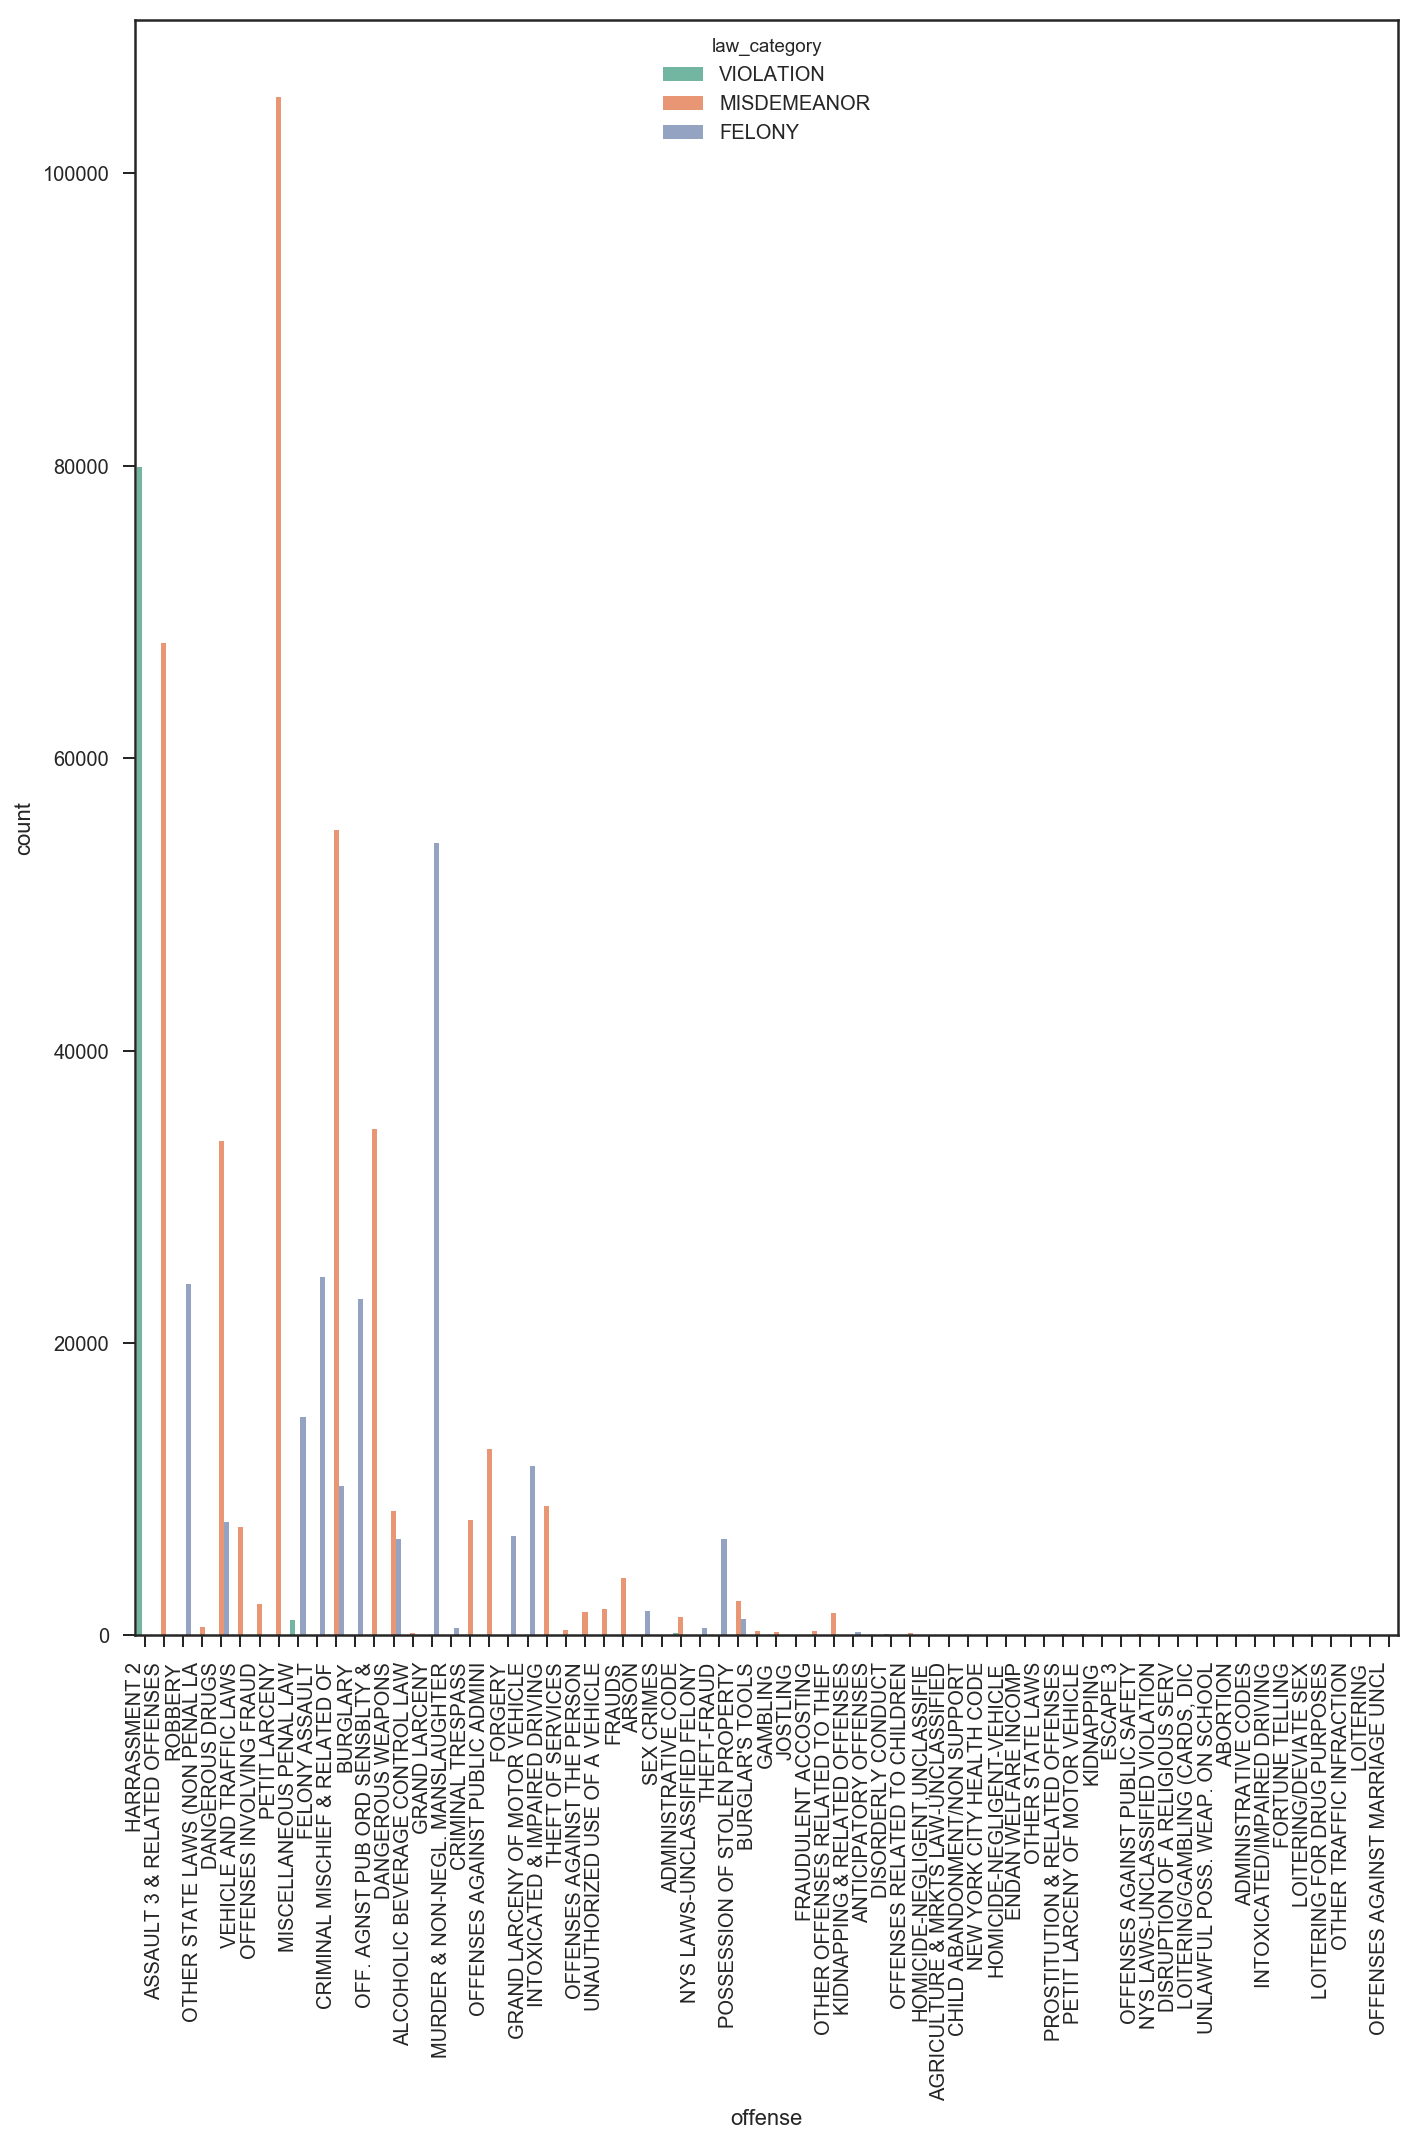

In [98]:
ax=sns.countplot(x="offense", data=df, hue='law_category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

plt.show()
plt.rcParams['figure.figsize']=10,10

### Borogh

In [107]:
borough_offense_category = pd.crosstab(index=df["offense"], 
                           columns=df["borough"], margins=True)


borough_offense_category.sort_values(by='All', ascending=False)[:5]

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,All
offense,,,,,,
All,139115,191039,151436,123649,29985,635224
PETIT LARCENY,18112,29581,33018,19932,4592,105235
HARRASSMENT 2,17433,24215,15803,16648,5846,79945
ASSAULT 3 & RELATED OFFENSES,16843,21431,13048,13527,3007,67856
CRIMINAL MISCHIEF & RELATED OF,13615,20593,11854,15021,4286,65369


% by borough:  

PETIT LARCENY Bronx 0.17 BROOKLYN 0.28 MANHATTAN 0.31 QUEENS 0.19 STATEN ISLAND 0.04  
HARRASSMENT 2 Bronx 0.22 BROOKLYN 0.30 MANHATTAN 0.20 QUEENS 0.21 STATEN ISLAND 0.07   
ASSAULT 3 & RELATED OFFENSES Bronx 0.25 BROOKLYN 0.32 MANHATTAN 0.19 QUEENS 0.20 STATEN ISLAND 0.04  
CRIMINAL MISCHIEF & RELATED OF Bronx 0.21 BROOKLYN 0.32 MANHATTAN 0.18 QUEENS 0.23 STATEN ISLAND 0.07  

It seems Brooklyn has a highest rate except in petit larceny as Manhattan has higher.

### Crime by time of the day

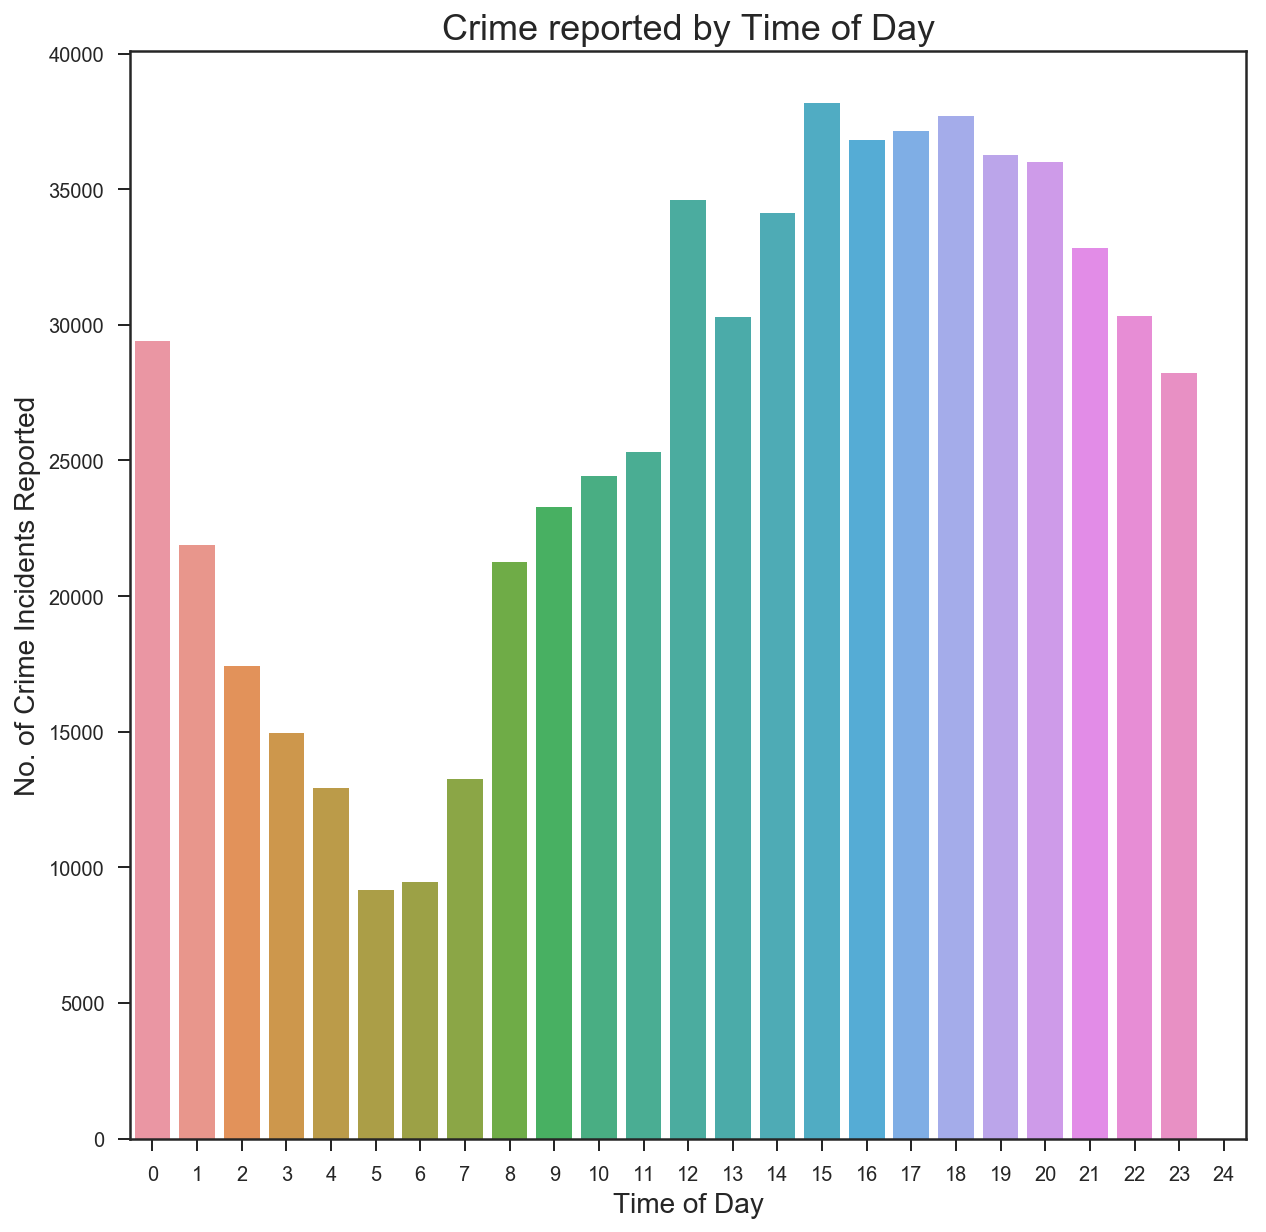

In [111]:
sns.countplot('hour', data=df, order=range(25))
plt.xlabel("Time of Day", fontsize=14)
plt.ylabel("No. of Crime Incidents Reported", fontsize=14)
plt.title("Crime reported by Time of Day",fontsize=18)

The peak hours are between 15 and 21 hour and the lowest hours are between 2 and 7.

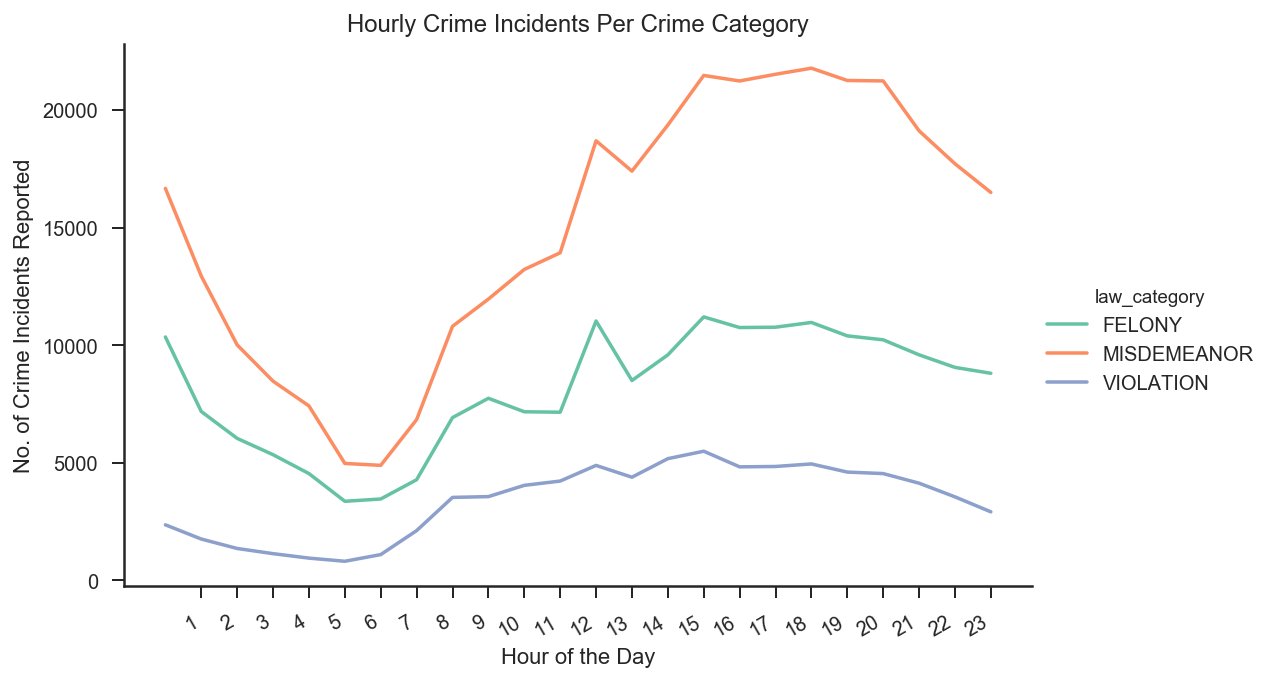

In [112]:
crimeCategorygroup = df.groupby(["hour","law_category"])
crimeCategorygroup = crimeCategorygroup.size().reset_index()
crimeCategorygroup.columns = ['hour','law_category','count']
g = sns.FacetGrid(crimeCategorygroup, hue='law_category', size=5, aspect=1.5)
g.map(plt.plot, 'hour', 'count').add_legend()
g.ax.set(xlabel='Hour of the Day',
    xticks = np.arange(1,24,1),
    ylabel='No. of Crime Incidents Reported',
    title='Hourly Crime Incidents Per Crime Category')
g.fig.autofmt_xdate()

The crime trend is similar for the law categories

In [113]:
# TOP 5 offence crime
offense_crime = pd.crosstab(index=df["offense"],  
                              columns="count")     

offense_crime.sort_values(by='count',ascending=False)[:5]

col_0,count
offense,
PETIT LARCENY,105236
HARRASSMENT 2,79945
ASSAULT 3 & RELATED OFFENSES,67856
CRIMINAL MISCHIEF & RELATED OF,65369
GRAND LARCENY,54184


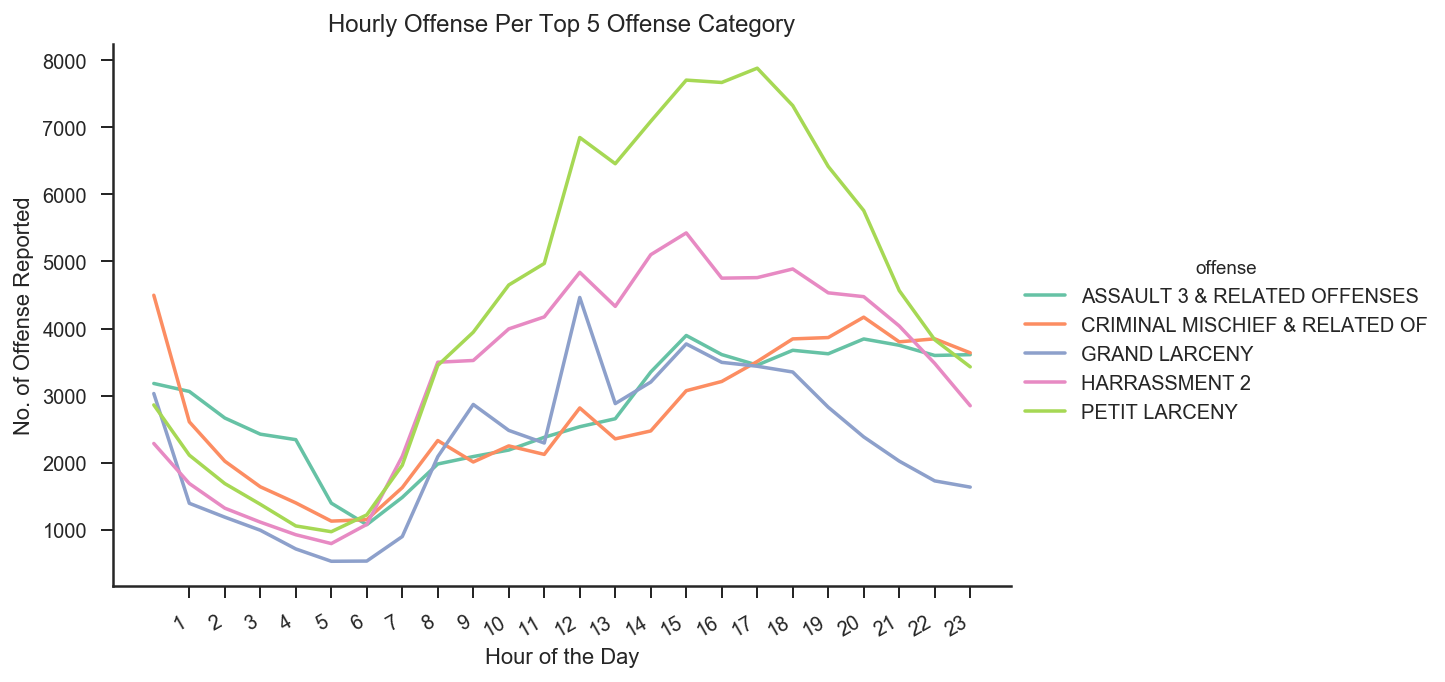

In [114]:
crimeOffensegroup = df.groupby(["hour","offense"])
crimeOffensegroup = crimeOffensegroup.size().reset_index()
crimeOffensegroup.columns = ['hour','offense','count']
crimeOffensegroup = crimeOffensegroup[(crimeOffensegroup.offense=='PETIT LARCENY')|
                 (crimeOffensegroup.offense=='HARRASSMENT 2')| 
                  (crimeOffensegroup.offense=='ASSAULT 3 & RELATED OFFENSES')|
                  (crimeOffensegroup.offense=='CRIMINAL MISCHIEF & RELATED OF')|
                  (crimeOffensegroup.offense=='GRAND LARCENY')]
g = sns.FacetGrid(crimeOffensegroup, hue='offense', size=5, aspect=1.5)
g.map(plt.plot, 'hour', 'count').add_legend()
g.ax.set(xlabel='Hour of the Day',
    xticks = np.arange(1,24,1),
    ylabel='No. of Offense Reported',
    title='Hourly Offense Per Top 5 Offense Category')
g.fig.autofmt_xdate()   

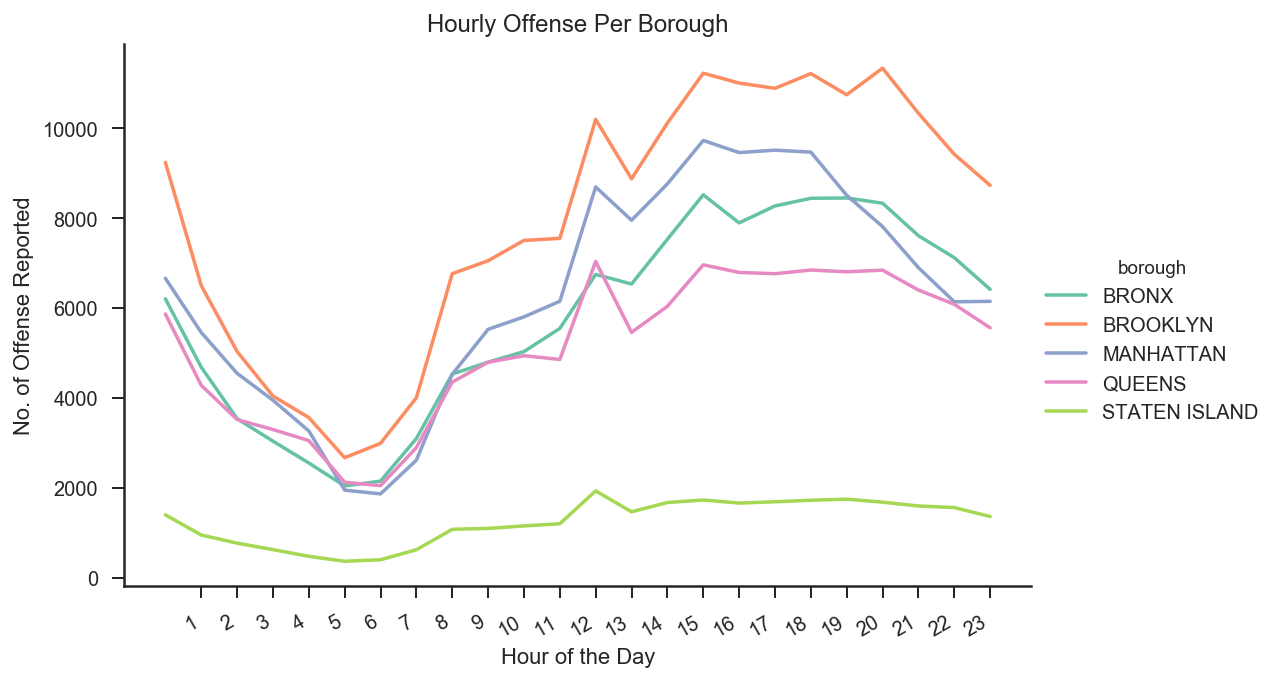

In [115]:
District = df.groupby(["hour","borough"])
District = District.size().reset_index()
District.columns = ['hour','borough','count']
g = sns.FacetGrid(District, hue='borough', size=5, aspect=1.5)
g.map(plt.plot, 'hour', 'count').add_legend()
g.ax.set(xlabel='Hour of the Day',
    xticks = np.arange(1,24,1),
    ylabel='No. of Offense Reported',
    title='Hourly Offense Per Borough')
g.fig.autofmt_xdate()  

### Crime by day of the month

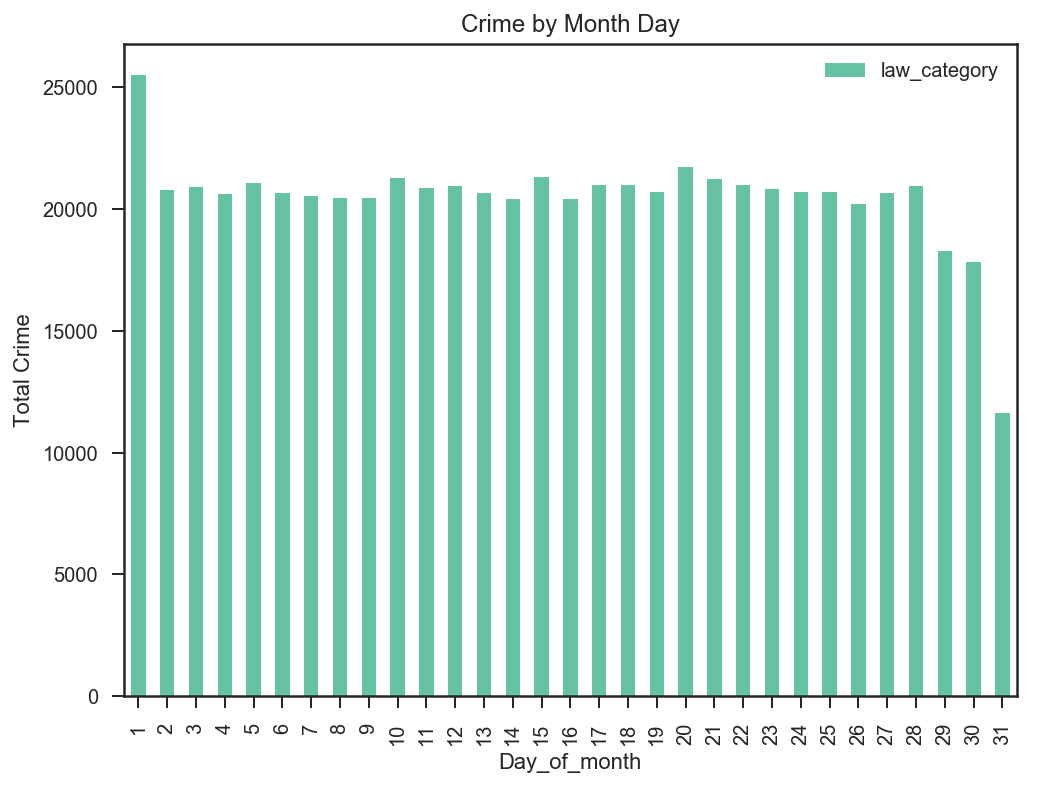

In [118]:
monthdays = df.pivot_table(index=['Day_of_month'],
                                  values='law_category',
                                  aggfunc='count')
monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Crime')
plt.title('Crime by Month Day')

### Correlation

In [144]:
dfx = df.copy()
dfx = dfx.drop(['from_date','offense_cutoff','premise', 'from_time', 'to_date', 'to_time', 'occurence', 'offense_description', 'offense'], axis = 1)
dfx = dfx.drop(['latitude','longitude','year','Month','weekday','time_str','time'],axis=1)
dfx.dropna()
dfx.head(1)

,law_category,borough,holiday,hour,no_of_month,Day_of_month,no_of_weekday
0,VIOLATION,BROOKLYN,0,23,3,31,4


In [145]:
dft = pd.get_dummies(dfx, prefix="", prefix_sep="", columns=['borough', 'law_category'])

In [146]:
dft.corr()

,holiday,hour,no_of_month,Day_of_month,no_of_weekday,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION
holiday,1.000000,-0.012302,-0.008042,-0.043846,-0.171978,0.000539,0.002135,-0.006917,0.004269,0.000261,0.000534,-0.000837,0.000504
hour,-0.012302,1.000000,0.002647,0.012461,-0.065352,0.017878,0.005909,-0.010377,-0.017131,0.005183,-0.040839,0.020735,0.025575
no_of_month,-0.008042,0.002647,1.000000,0.006091,-0.000993,-0.007510,0.004167,0.000278,0.000827,0.003530,0.014191,-0.006644,-0.009720
Day_of_month,-0.043846,0.012461,0.006091,1.000000,-0.007162,0.001827,-0.002285,0.001638,-0.001745,0.001351,0.001640,-0.001289,-0.000350
no_of_weekday,-0.171978,-0.065352,-0.000993,-0.007162,1.000000,-0.006578,-0.001952,0.005542,0.002871,0.000548,-0.005542,0.013656,-0.012613
BRONX,0.000539,0.017878,-0.007510,0.001827,-0.006578,1.000000,-0.347277,-0.296268,-0.260338,-0.117865,-0.042017,0.039891,-0.001217
BROOKLYN,0.002135,0.005909,0.004167,-0.002285,-0.001952,-0.347277,1.000000,-0.366915,-0.322418,-0.145971,0.024556,-0.024148,0.001949
MANHATTAN,-0.006917,-0.010377,0.000278,0.001638,0.005542,-0.296268,-0.366915,1.000000,-0.275060,-0.124530,0.011098,0.013207,-0.034900
QUEENS,0.004269,-0.017131,0.000827,-0.001745,0.002871,-0.260338,-0.322418,-0.275060,1.000000,-0.109428,0.027800,-0.034074,0.012200
STATEN ISLAND,0.000261,0.005183,0.003530,0.001351,0.000548,-0.117865,-0.145971,-0.124530,-0.109428,1.000000,-0.045354,0.011498,0.045506


### Heatmap

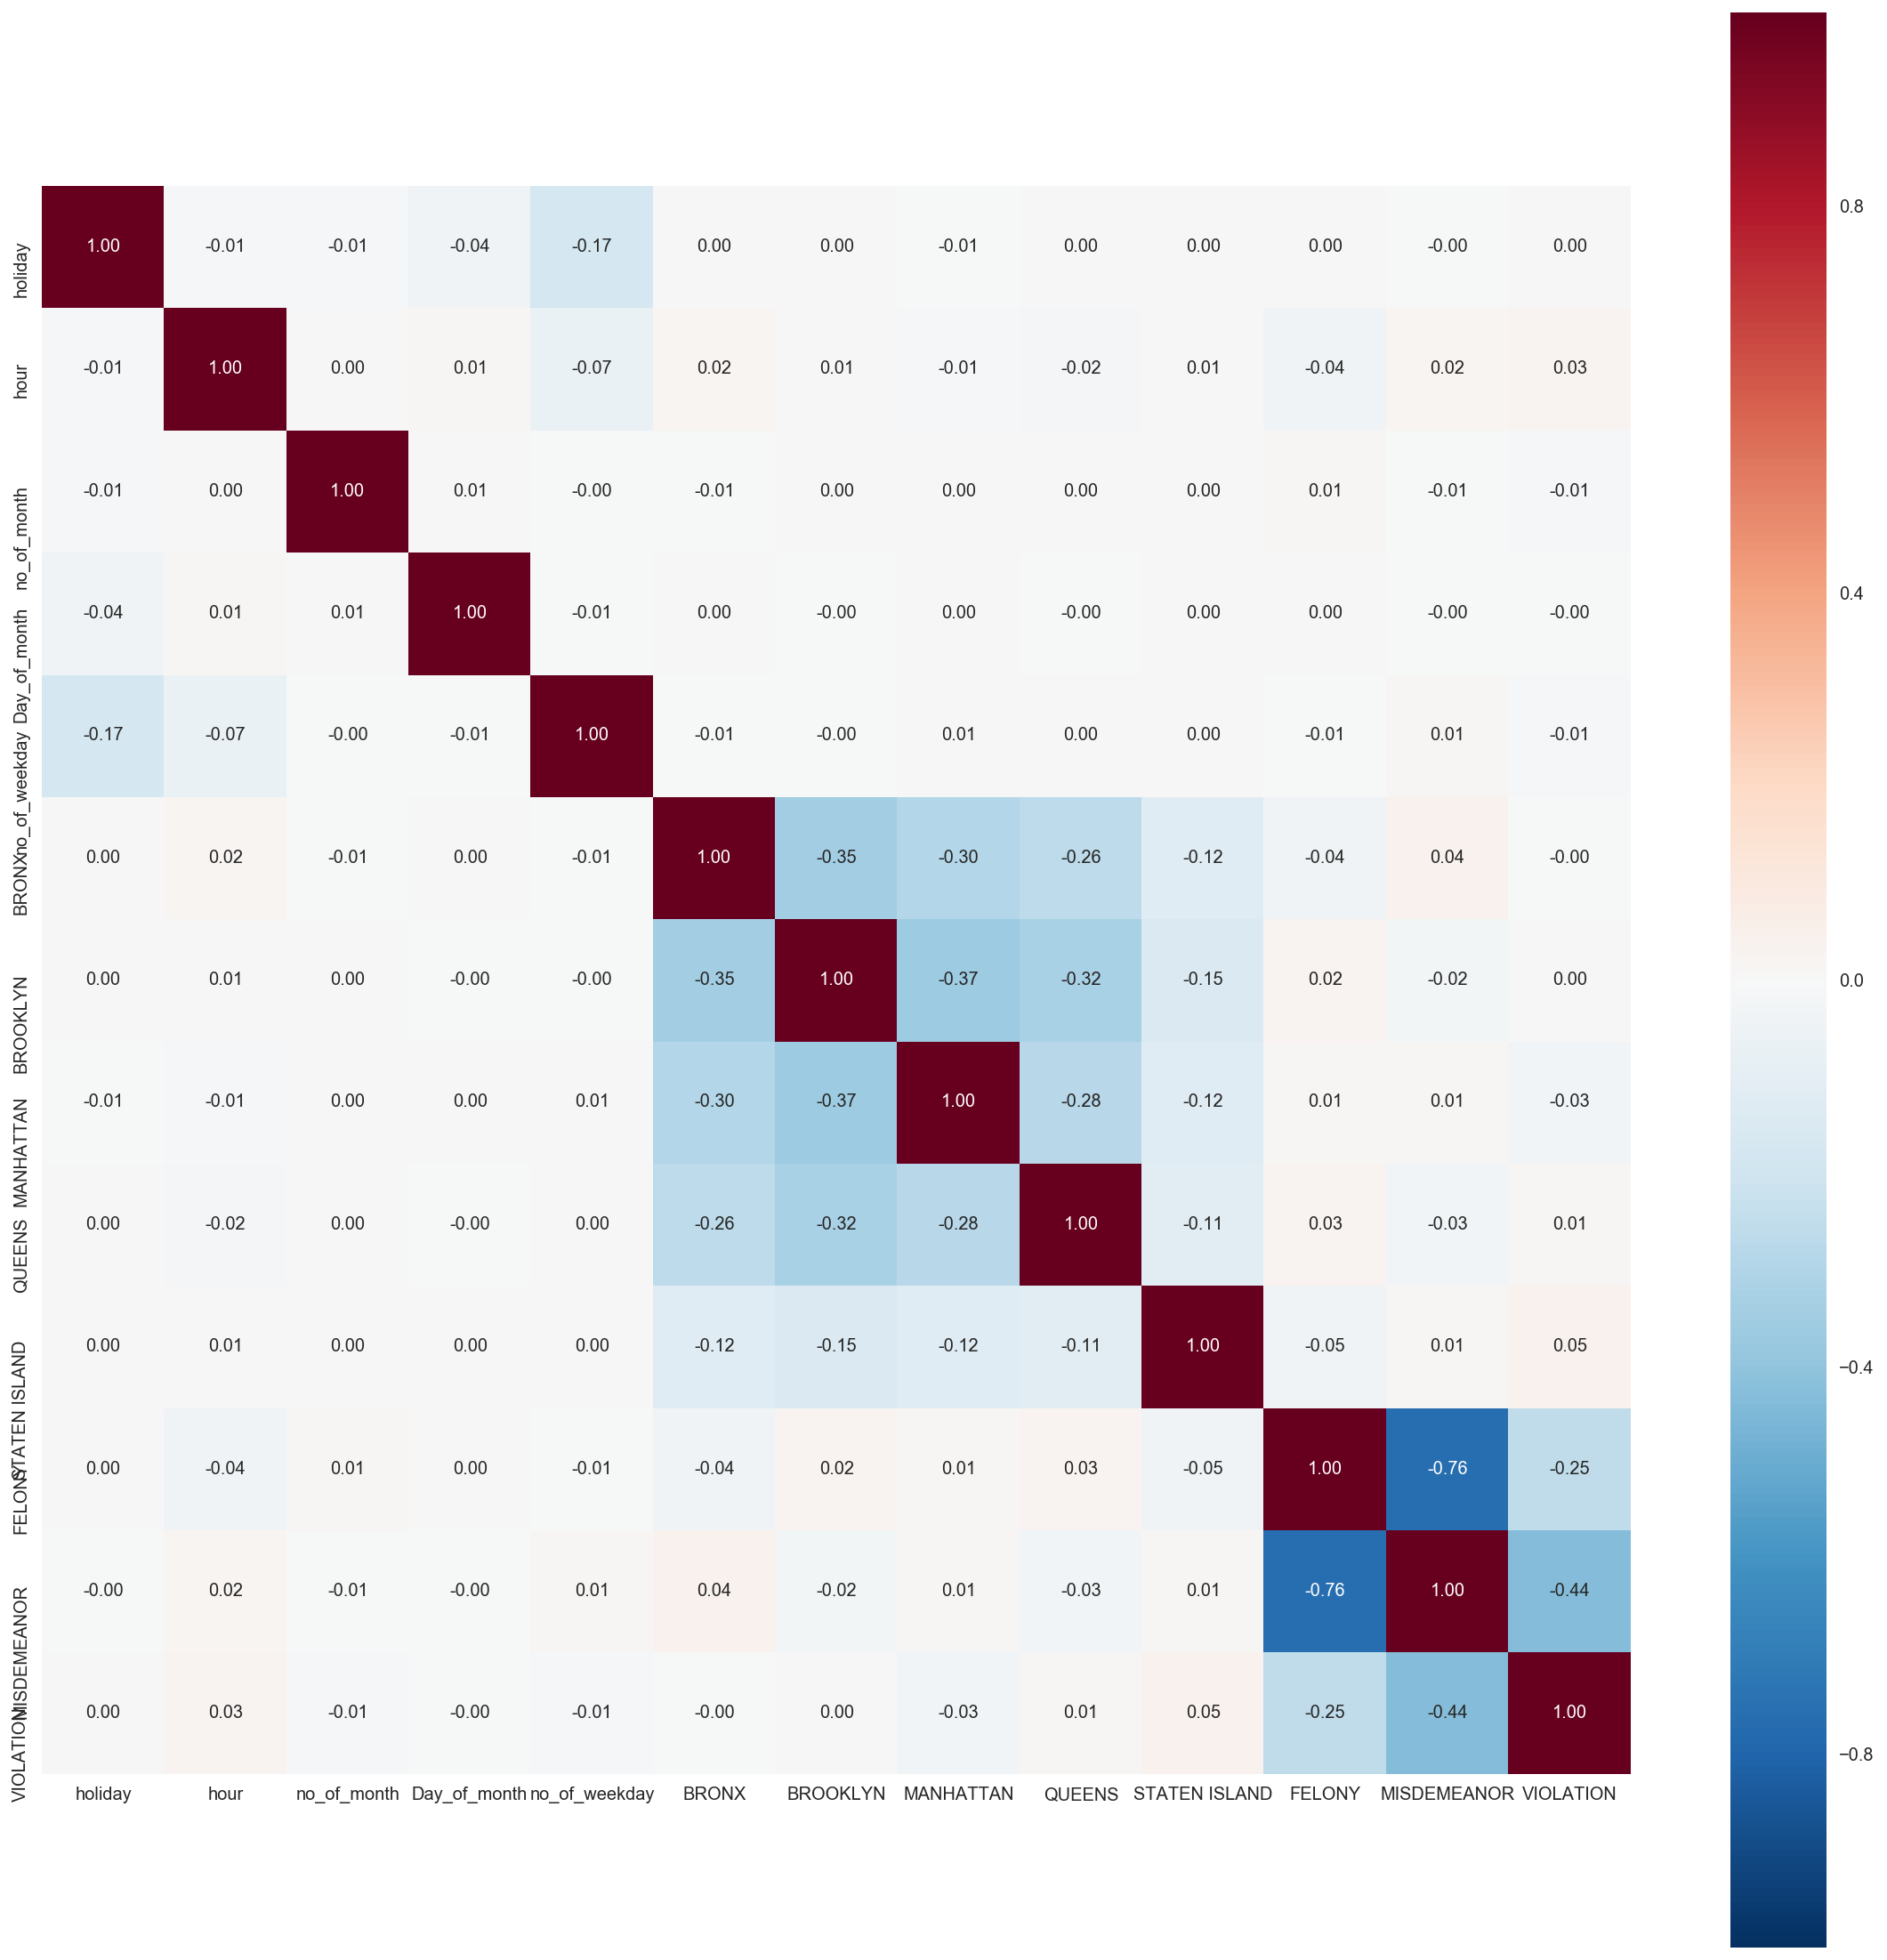

In [148]:
cols = dft.columns.values
cm = np.corrcoef(dft.values.T)
sns.set(font_scale=1.0)
plt.rcParams['figure.figsize']=20,20
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)

The strongest correlation is between the boroughs or between the law categories.  
There is no strong correlation between the feauters.